<a href="https://colab.research.google.com/github/quannguyen2412899/SCAD-TSA/blob/master/colab/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mở đầu

**Chủ đề:** Nén và phát hiện chuỗi bất thường bằng Trie và phân tích thống kê

**Sinh viên:** Trần Tấn Phát, Nguyễn Anh Quân

***Colab notebook này phục vụ cho việc demo chương trình.***

## Thiết lập

In [1]:
# Clone repo
!git clone https://github.com/quannguyen2412899/SCAD-TSA.git
%cd SCAD-TSA

Cloning into 'SCAD-TSA'...
remote: Enumerating objects: 409, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 409 (delta 40), reused 51 (delta 19), pack-reused 301 (from 1)
Receiving objects: 100% (409/409), 6.28 MiB | 9.34 MiB/s, done.
Resolving deltas: 100% (183/183), done.
/content/SCAD-TSA


In [2]:
# Cài đặt Graphviz và python pandas
!apt-get install graphviz
%pip install graphviz pandas

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


## Biên dịch

In [3]:
!mkdir -p bin
# Biên dịch module preprocess
!g++ -std=c++17 -I./include src/preprocess.cpp src/Preprocessor.cpp -o bin/preprocess
# Biên dịch module analyze
!g++ -std=c++17 -I./include src/analyze.cpp src/Analysis.cpp src/StatTrie.cpp -o bin/analyze
# Biên dịch module visualize
!g++ -std=c++17 -I./include src/visualize.cpp -o bin/visualize
# Biên dịch chương trình chính
!g++ -std=c++17 -I./include src/main_pipeline.cpp -o main_pipeline

## Chuẩn bị dữ liệu


In [4]:
# Chuẩn bị thư mục
!mkdir data results

In [5]:
import random
import string

# Cấu hình file output
output_file = "data/sample_generated.log"

print("🔄 Đang sinh dữ liệu giả lập...")

with open(output_file, "w") as f:
    # ---------------------------------------------------------
    # 1. DỮ LIỆU BÌNH THƯỜNG (NORMAL TRAFFIC)
    # ---------------------------------------------------------
    normal_patterns = [
        "INFO: GET /index.html 200",
        "INFO: GET /home.php 200",
        "INFO: GET /img/logo.png 200",
        "INFO: GET /img/banner.jpg 200",
        "INFO: POST /login 200"
    ]

    # Sinh 5000 dòng bình thường
    for _ in range(5000):
        f.write(random.choice(normal_patterns) + "\n")

    # ---------------------------------------------------------
    # 2. BẤT THƯỜNG TẦN SUẤT (FREQUENCY ANOMALY)
    # - Đặc điểm: Chuỗi duy nhất, chưa từng thấy.
    # ---------------------------------------------------------
    # Kẻ tấn công thử lệnh shutdown hệ thống (chỉ 1 lần)
    f.write("CRITICAL: SYSTEM SHUTDOWN INITIATED BY REMOTE HOST\n")
    print("-> Gài 1 Bất thường Tần suất (Shutdown Command).")

    # ---------------------------------------------------------
    # 3. BẤT THƯỜNG ĐỘ DÀI (LENGTH ANOMALY - Rare Length)
    # - Đặc điểm: Độ dài mà 5000 dòng kia không có.
    # ---------------------------------------------------------
    # Tấn công Buffer Overflow: Chuỗi dài 500 ký tự 'A'
    buffer_overflow = "ERROR: Input buffer overflow " + ("A" * 500)
    f.write(buffer_overflow + "\n")
    print("-> Gài 1 Bất thường Độ dài (Buffer Overflow - 500 chars).")

    # ---------------------------------------------------------
    # 4. BẤT THƯỜNG ENTROPY CAO (ENTROPY ANOMALY)
    # - Đặc điểm: Tại một node, nhánh rẽ ra quá nhiều hướng (Hỗn loạn).
    # ---------------------------------------------------------
    # Tấn công Fuzzing: Thử 100 ký tự rác khác nhau vào tham số 'token='
    fuzzing_chars = string.ascii_letters + string.digits + "!@#$%^&*()"
    for i in range(100):
        # Chọn ngẫu nhiên 1 ký tự để tạo nhánh ngay lập tức
        char = fuzzing_chars[i % len(fuzzing_chars)]
        f.write(f"WARN: Invalid token={char}...\n")

    print("-> Gài 100 dòng Bất thường Entropy Cao (Fuzzing Attack).")

print(f"✅ Đã tạo file: {output_file}")

🔄 Đang sinh dữ liệu giả lập...
-> Gài 1 Bất thường Tần suất (Shutdown Command).
-> Gài 1 Bất thường Độ dài (Buffer Overflow - 500 chars).
-> Gài 100 dòng Bất thường Entropy Cao (Fuzzing Attack).
✅ Đã tạo file: data/sample_generated.log


## Chạy thử chương trình

#### Chạy pipeline

In [6]:
# Phân tích dữ liệu sample, hiển thị cây trie thu gọn, chọn phần vị tần suất, độ dài và entropy lần lượt là P1, P1, P99
!./main_pipeline data/sample_generated.log results --visual-partial --perc-freq=1 --perc-len=1 --perc-entropy=99

========== Preprocess ==========
Cleaned data exported to: results/cleaned_data.txt
========== Analyze and report ==========
Report is saved at: results/overall_report.txt
CSV is saved at: results/all_entries.csv
CSV is saved at: results/frequency_anomalies.csv
CSV is saved at: results/length_anomalies.csv
CSV is saved at: results/entropy_anomalies.csv
JSON is saved at: results/partial_trie.json
========== Visualize trie ==========
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.477277 to fit
Visualization saved at: results/partial_trie.png

Results at: results


#### Hiển thị kết quả
##### Báo cáo tổng quan

In [7]:
!cat results/overall_report.txt

==================== TRIE ANALYSIS REPORT ====================

------------------------ Trie statistics -----------------------

- Total inserted words: 5102
- Total unique words: 53
- Total unique-word characters: 1808
- Total nodes: 865
- Compressed rate (total unique-word characters / total nodes): 2.09017

----------------------- Extremum statistics ------------------------

Word frequency:
- Max frequency: 1046
- Min frequency: 1

Word length (depth):
- Max length: 529
- Min length: 21

Entropy (local node entropy):
- Max entropy: 5.34268
- Min entropy: 0

-------------------- ANOMALIES DETECTION --------------------

-------------------------- Thresholds ----------------------------

- Word frequency threshold (1% lower percentile): 1
- Length frequency threshold (1% lower percentile): 1
- Entropy threshold (99% upper percentile): 5.34268

-------------------- Anomalies: frequency-based --------------------

critical: system shutdown initiated by remote host, frequency = 1
error

##### Danh sách bất thường

In [8]:
# Danh sách bất thường tần suất
import pandas as pd
df = pd.read_csv("results/frequency_anomalies.csv")
df.index = df.index + 1
display(df)

,String,Kind,Frequency,Length,Length frequency,Entropy,Rate,Anomaly
1,critical: system shutdown initiated by remote ...,word,1,50,1,0,0.000196,frequency/length
2,error: input buffer overflow aaaaaaaaaaaaaaaaa...,word,1,529,1,0,0.000196,frequency/length
3,warn: invalid token=!...,word,1,24,100,0,0.000196,frequency
4,warn: invalid token=#...,word,1,24,100,0,0.000196,frequency
5,warn: invalid token=$...,word,1,24,100,0,0.000196,frequency
6,warn: invalid token=%...,word,1,24,100,0,0.000196,frequency
7,warn: invalid token=&...,word,1,24,100,0,0.000196,frequency
8,warn: invalid token=(...,word,1,24,100,0,0.000196,frequency
9,warn: invalid token=)...,word,1,24,100,0,0.000196,frequency
10,warn: invalid token=*...,word,1,24,100,0,0.000196,frequency


In [9]:
# Danh sách bất thường độ dài
import pandas as pd
df = pd.read_csv("results/length_anomalies.csv")
df.index = df.index + 1
display(df)

,String,Kind,Frequency,Length,Length frequency,Entropy,Rate,Anomaly
1,critical: system shutdown initiated by remote ...,word,1,50,1,0,0.000196,frequency/length
2,error: input buffer overflow aaaaaaaaaaaaaaaaa...,word,1,529,1,0,0.000196,frequency/length


In [10]:
# Danh sách bất thường entropy
import pandas as pd
df = pd.read_csv("results/entropy_anomalies.csv")
df.index = df.index + 1
display(df)

,String,Kind,Frequency,Length,Length frequency,Entropy,Rate,Anomaly
1,warn: invalid token=,prefix,100,20,0,5.34268,0.0196,entropy


Ngoài ra còn có danh sách tất cả các chuỗi/tiền tố được thống kê trong ```results/all_entries.csv```

In [11]:
import pandas as pd
df = pd.read_csv("results/all_entries.csv")
df.index = df.index + 1
display(df)

,String,Kind,Frequency,Length,Length frequency,Entropy,Rate,Anomaly
1,critical: system shutdown initiated by remote ...,word,1,50,1,0.000000,0.000196,frequency/length
2,error: input buffer overflow aaaaaaaaaaaaaaaaa...,word,1,529,1,0.000000,0.000196,frequency/length
3,info:,prefix,5000,6,0,0.728676,0.980008,NaN
4,info: get /,prefix,3983,11,0,0.830669,0.780674,NaN
5,info: get /home.php 200,word,1046,23,1046,0.000000,0.205018,NaN
6,info: get /i,prefix,2937,12,0,0.917955,0.575657,NaN
7,info: get /img/,prefix,1959,15,0,0.999995,0.383967,NaN
8,info: get /img/banner.jpg 200,word,982,29,982,0.000000,0.192474,NaN
9,info: get /img/logo.png 200,word,977,27,977,0.000000,0.191494,NaN
10,info: get /index.html 200,word,978,25,978,0.000000,0.191690,NaN


##### Hiển thị cây Trie

In [12]:
from IPython.display import Image, display
display(Image("results/partial_trie.png"))

## Chạy thử trên dữ liệu tuỳ ý

Chuẩn bị dữ liệu trên Google drive và chạy theo hướng dẫn:

In [13]:
from google.colab import drive

# Mount drive vào thư mục /content/drive
drive.mount('/content/drive')

print("\n✅ Đã kết nối Drive thành công!")

Mounted at /content/drive

✅ Đã kết nối Drive thành công!


In [14]:
import os

# Dán đường dẫn file log của bạn vào đây (ví dụ: /content/drive/MyDrive/uni/251/DSA/SCAD-TSA/raw_install_log.txt):
user_file_path = "/content/drive/MyDrive/uni/251/DSA/SCAD-TSA/raw_system_log.txt"

# --- VALIDATION LOGIC ---
if not os.path.exists(user_file_path):
    print(f"❌ LỖI: Không tìm thấy file tại '{user_file_path}'")
    print("👉 Vui lòng kiểm tra lại đường dẫn.")
else:
    print(f"✅ Đã tìm thấy file: {os.path.basename(user_file_path)}")
    print("🔍 Vài dòng đầu của file (nếu muốn sử dụng regex):\n")
    !head -n 10 {user_file_path} && echo
    !echo "Kích thước:" $(wc -l < {user_file_path}) "dòng"

✅ Đã tìm thấy file: raw_system_log.txt
🔍 Vài dòng đầu của file (nếu muốn sử dụng regex):

Nov 29 00:00:00 macbookair remindd[97882]: objc[97882]: Class REMCDChangeTrackingState is implemented in both /System/Library/PrivateFrameworks/ReminderKit.framework/Versions/A/ReminderKit and /usr/libexec/remindd. One of the two will be used. Which one is undefined.
Nov 29 00:00:00 macbookair remindd[97882]: objc[97882]: Class REMDAAccountInfo is implemented in both /System/Library/PrivateFrameworks/CDDataAccess.framework/Frameworks/DACalDAV.framework/Versions/A/DACalDAV (0x7fff81d6cc90) and /System/Library/PrivateFrameworks/CDDataAccess.framework/Frameworks/DACalDAV.framework/DADaemonCalDAV.bundle/Contents/MacOS/DADaemonCalDAV (0x10d431a78). One of the two will be used. Which one is undefined.
Nov 29 00:00:00 macbookair com.apple.xpc.launchd[1] (com.apple.mdworker.shared.06000000-0000-0000-0000-000000000000[97789]): Service exited due to SIGKILL | sent by mds[104]
Nov 29 00:00:02 macbookair com.

Tuỳ chỉnh cấu hình:

In [15]:
import os

# Cấu hình Tiền xử lý (Preprocess)
# Để trống nếu muốn dùng mặc định. Nhập Regex nếu file có format phức tạp.
custom_regex = r"^\S+ \S+ \d\d:\d\d:\d\d macbookair ([^:]+): .+$"   # ví dụ: r"^\S+\s+\S+\s+\S+\s(.+)$"
custom_delim = ""
custom_ignore = ""

# Cấu hình Phân tích (Analyze)
# Chọn ngưỡng phần vị (Percentile) để phát hiện bất thường:
perc_freq = 0.1
perc_len = 0.1
perc_entropy = 99.9

# Trực quan hóa
# param ["None", "Partial (Anomalies Only)", "Complete Trie (Caution!)", "Frequency Only", "Length Only", "Entropy Only"]
visual_mode = "Length Only"

Chạy pipeline:

In [16]:
# Thực thi Pipeline
import subprocess

# Map Visual Mode sang Flag
visual_flags_map = {
    "None": "",
    "Partial (Anomalies Only)": "--visual-partial",
    "Complete Trie (Caution!)": "--visual-complete",
    "Frequency Only": "--visual-freq",
    "Length Only": "--visual-len",
    "Entropy Only": "--visual-entropy"
}
selected_visual_flag = visual_flags_map[visual_mode]

# Xây dựng câu lệnh
cmd_parts = [
    "./main_pipeline",
    f'"{user_file_path}"',  # Input file
    "results_custom",       # Output folder
    selected_visual_flag,   # Visual flag
    f"--perc-freq={perc_freq}",
    f"--perc-len={perc_freq}",
    f"--perc-entropy={perc_entropy}"
]

# Thêm các cờ Preprocess tùy chọn
cmd_parts.append(f'--regex=\'{custom_regex}\'')
cmd_parts.append(f'--delim="{custom_delim}"')
cmd_parts.append(f'--ignore="{custom_ignore}"')

# Ghép thành chuỗi lệnh hoàn chỉnh
full_command = " ".join(cmd_parts)

print(f"🚀 Đang chạy lệnh: {full_command}\n")

# Thực thi
!mkdir results_custom
get_ipython().system(full_command)


🚀 Đang chạy lệnh: ./main_pipeline "/content/drive/MyDrive/uni/251/DSA/SCAD-TSA/raw_system_log.txt" results_custom --visual-len --perc-freq=0.1 --perc-len=0.1 --perc-entropy=99.9 --regex='^\S+ \S+ \d\d:\d\d:\d\d macbookair ([^:]+): .+$' --delim="" --ignore=""

========== Preprocess ==========
Cleaned data exported to results_custom/cleaned_data.txt
========== Analyze and report ==========
Report is saved at: results_custom/overall_report.txt
CSV is saved at: results_custom/all_entries.csv
CSV is saved at: results_custom/frequency_anomalies.csv
CSV is saved at: results_custom/length_anomalies.csv
CSV is saved at: results_custom/entropy_anomalies.csv
JSON is saved at: results_custom/length_anomalies.json
========== Visualize trie ==========
Visualization saved at: results_custom/length_anomalies.png

Results at: results_custom


Hiển thị báo cáo tổng quan

In [17]:
!cat results_custom/overall_report.txt

==================== TRIE ANALYSIS REPORT ====================

------------------------ Trie statistics -----------------------

- Total inserted words: 2209
- Total unique words: 2040
- Total unique-word characters: 187565
- Total nodes: 30200
- Compressed rate (total unique-word characters / total nodes): 6.21076

----------------------- Extremum statistics ------------------------

Word frequency:
- Max frequency: 66
- Min frequency: 1

Word length (depth):
- Max length: 98
- Min length: 9

Entropy (local node entropy):
- Max entropy: 3.96814
- Min entropy: 0

-------------------- ANOMALIES DETECTION --------------------

-------------------------- Thresholds ----------------------------

- Word frequency threshold (0.1% lower percentile): 1
- Length frequency threshold (0.1% lower percentile): 1
- Entropy threshold (99.9% upper percentile): 3.96814

-------------------- Anomalies: frequency-based --------------------

accessoryd[45008], frequency = 1
ampartworkagent[50122], freque

Hiển thị các danh sách:

In [18]:
# Danh sách bất thường tần suất
import pandas as pd
df = pd.read_csv("results_custom/frequency_anomalies.csv")
df.index = df.index + 1
display(df)

,String,Kind,Frequency,Length,Length frequency,Entropy,Rate,Anomaly
1,accessoryd[45008],word,1,17,14,0,0.000453,frequency
2,ampartworkagent[50122],word,1,22,1,0,0.000453,frequency/length
3,awdd[209],word,1,9,1,0,0.000453,frequency/length
4,com.apple.appkit.xpc.openandsavepanelservice[4...,word,1,51,4,0,0.000453,frequency
5,com.apple.appkit.xpc.openandsavepanelservice[4...,word,1,51,4,0,0.000453,frequency
...,...,...,...,...,...,...,...,...
1976,systemstats[85],word,1,15,1,0,0.000453,frequency/length
1977,tvcacheextension[50249],word,1,23,5,0,0.000453,frequency
1978,tvstorageextension[49484],word,1,25,3,0,0.000453,frequency
1979,xprotectremediatormrtv3[30458],word,1,30,2,0,0.000453,frequency


In [19]:
# Danh sách bất thường độ dài
import pandas as pd
df = pd.read_csv("results_custom/length_anomalies.csv")
df.index = df.index + 1
display(df)

,String,Kind,Frequency,Length,Length frequency,Entropy,Rate,Anomaly
1,ampartworkagent[50122],word,1,22,1,0,0.000453,frequency/length
2,awdd[209],word,1,9,1,0,0.000453,frequency/length
3,com.apple.bkagentservice[49476],word,1,31,1,0,0.000453,frequency/length
4,com.apple.xpc.launchd[1] (com.apple.bsd.dirhel...,word,1,56,1,0,0.000453,frequency/length
5,com.apple.xpc.launchd[1] (com.apple.cloudd[435]),word,1,48,1,0,0.000453,frequency/length
6,com.apple.xpc.launchd[1] (com.apple.dpsubmissi...,word,1,63,1,0,0.000453,frequency/length
7,com.apple.xpc.launchd[1] (com.apple.podcasts.m...,word,1,80,1,0,0.000453,frequency/length
8,com.apple.xpc.launchd[1] (com.apple.reportmemo...,word,1,58,1,0,0.000453,frequency/length
9,com.apple.xpc.launchd[1] (com.apple.screensave...,word,1,68,1,0,0.000453,frequency/length
10,com.apple.xpc.launchd[1] (com.apple.screensave...,word,1,69,1,0,0.000453,frequency/length


In [20]:
# Danh sách bất thường entropy
import pandas as pd
df = pd.read_csv("results_custom/entropy_anomalies.csv")
df.index = df.index + 1
display(df)

,String,Kind,Frequency,Length,Length frequency,Entropy,Rate,Anomaly
1,com.apple.xpc.launchd[1] (com.apple.webkit.net...,prefix,367,54,0,3.96814,0.166139,entropy


In [21]:
# Danh sách tất cả các chuỗi được xét
import pandas as pd
df = pd.read_csv("results_custom/all_entries.csv")
df.index = df.index + 1
display(df)

,String,Kind,Frequency,Length,Length frequency,Entropy,Rate,Anomaly
1,a,prefix,5,1,0,1.92193,0.002263,NaN
2,accessoryd[45008],word,1,17,14,0.00000,0.000453,frequency
3,akd[50241],word,2,10,17,0.00000,0.000905,NaN
4,ampartworkagent[50122],word,1,22,1,0.00000,0.000453,frequency/length
5,awdd[209],word,1,9,1,0.00000,0.000453,frequency/length
...,...,...,...,...,...,...,...,...
2890,tvcacheextension[50249],word,1,23,5,0.00000,0.000453,frequency
2891,tvstorageextension[49484],word,1,25,3,0.00000,0.000453,frequency
2892,xprotectremediatormrtv3[3,prefix,2,25,0,1.00000,0.000905,NaN
2893,xprotectremediatormrtv3[30458],word,1,30,2,0.00000,0.000453,frequency


Hiển thị hình ảnh trực quan Trie:

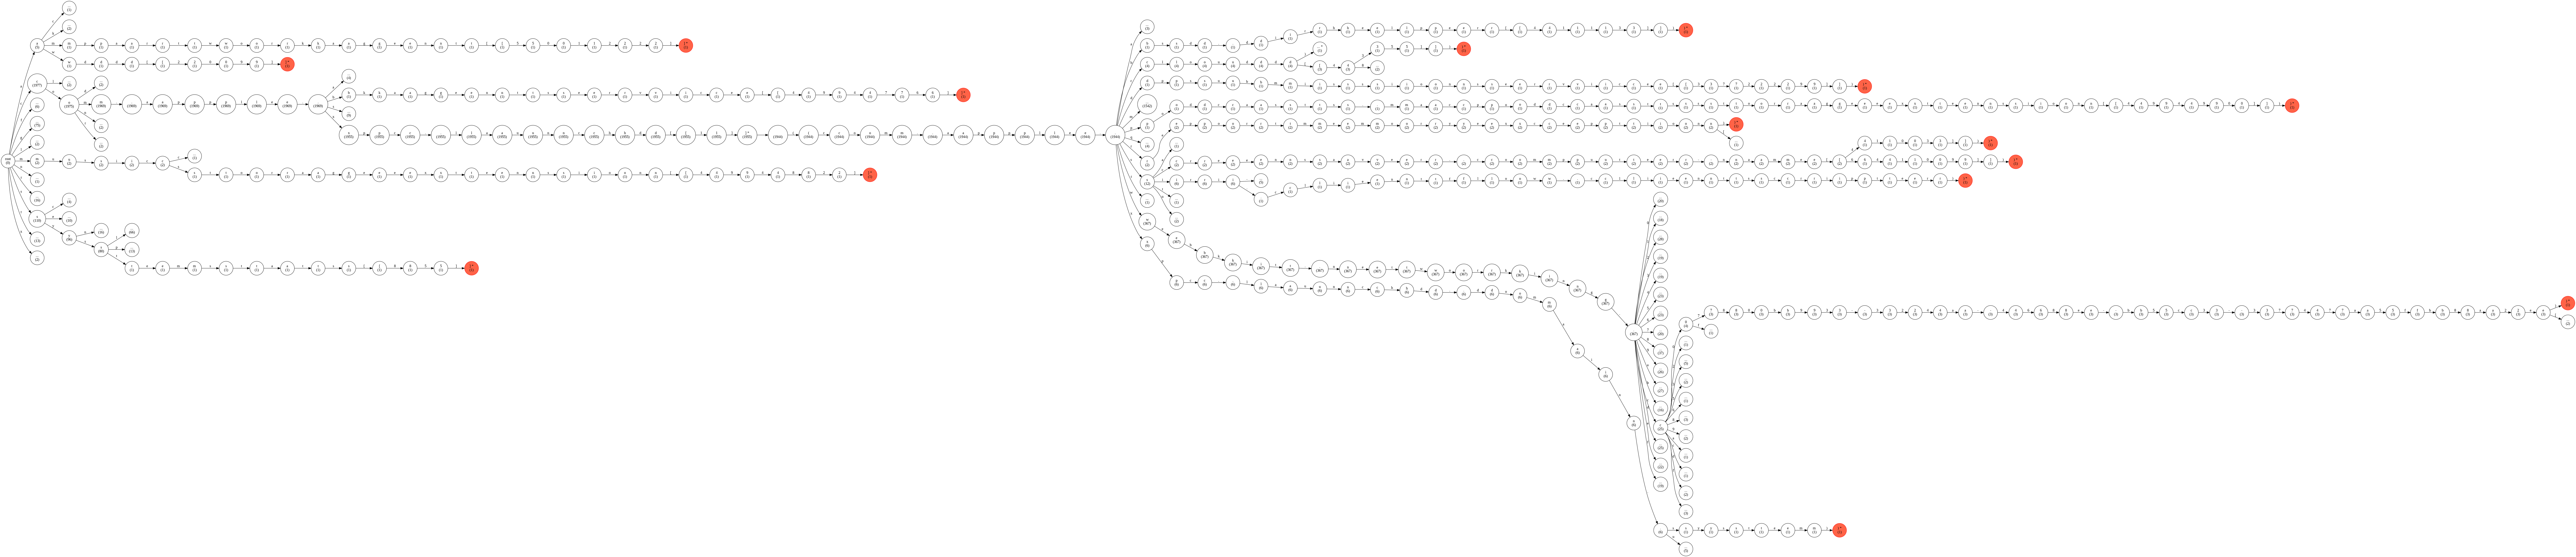

In [22]:
from IPython.display import Image, display

if (visual_mode == "Partial (Anomalies Only)"):
    display(Image("results_custom/partial_trie.png"))
elif (visual_mode == "Complete Trie (Caution!)"):
    display(Image("results_custom/complete_trie.png"))
elif (visual_mode == "Frequency Only"):
    display(Image("results_custom/frequency_anomalies.png"))
elif (visual_mode == "Length Only"):
    display(Image("results_custom/length_anomalies.png"))
elif (visual_mode == "Entropy Only"):
    display(Image("results_custom/entropy_anomalies.png"))



## Reset

In [23]:
%cd /content
!rm -r SCAD-TSA

/content
